### 문제


In [1]:
! # 시작시간 체크

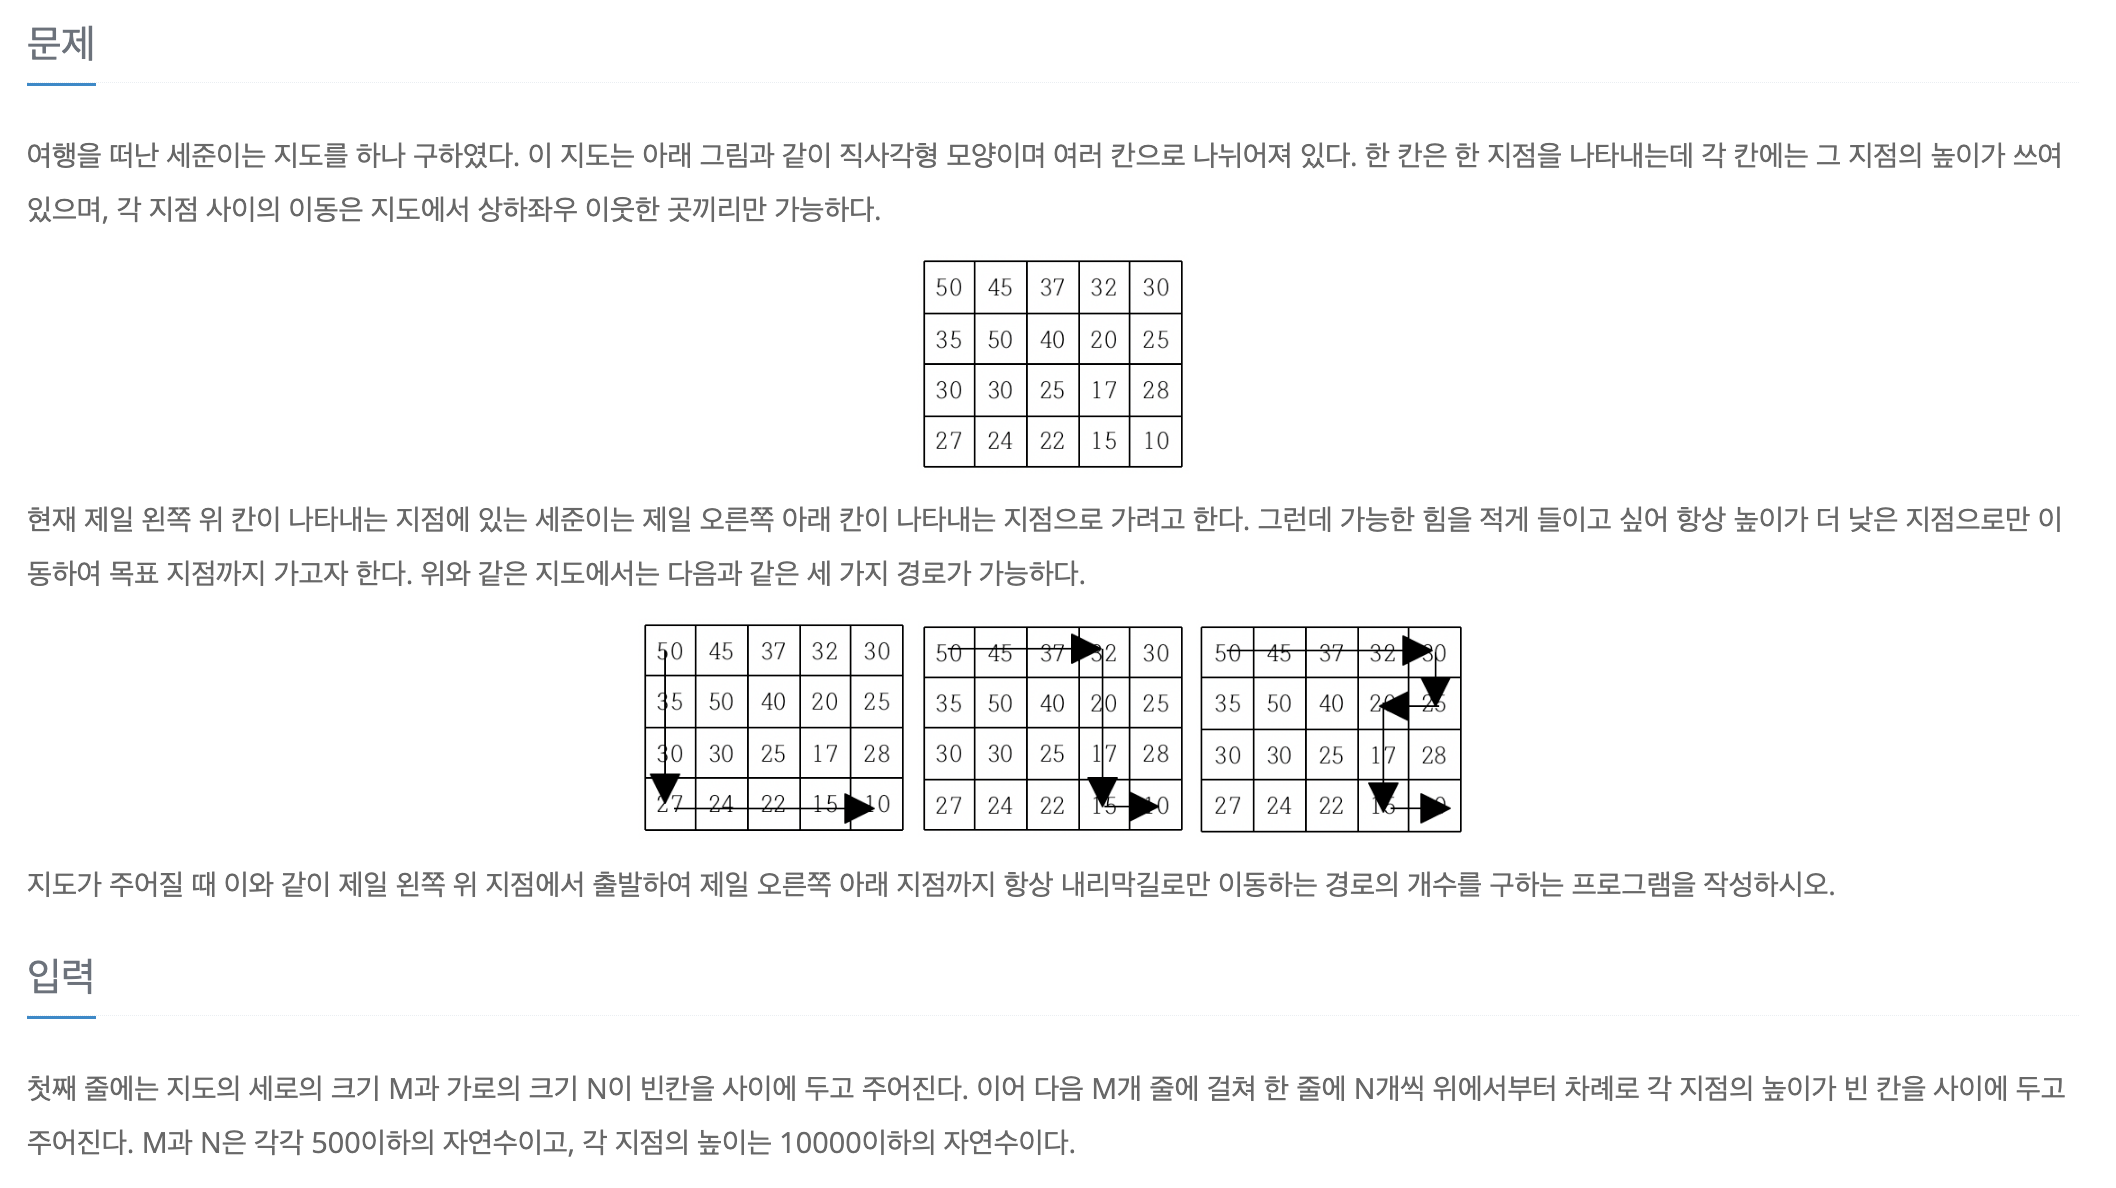

상상 코딩

    M과 N은 각각 500이하의 자연수이고, 각 지점의 높이는 10000이하의 자연수
    첫째 줄에 이동 가능한 경로의 수 H를 출력한다. 모든 입력에 대하여 H는 10억 이하의 음이 아닌 정수
    BFS를 방문표시하면서 하면 돌아가더라도 도착하는 경로가 나오지 않는다.
    방문 표시를 안하고, BFS를 낮아지는 방향으로만 하면 정답은 보장되지만, 시간복잡도가 되지 않는다. 정점은 최대 500*500이고 시간복잡도는 제곱 백억이 넘는다.
    BFS를 돌면서, visited에 가능한 경로수를 채워나가는 방향. 처음에 1로 시작(나머지 위치는 0으로 초기화). 
    작아지는 방향에 이전 위치 + 현재 위치 더하기.
    즉, 현재에서 작아지는 곳을 방문할때마다, 해당 위치 방문 경로수 + 이전 방문위치 방문 경로수로 쭉 채워나가기. 

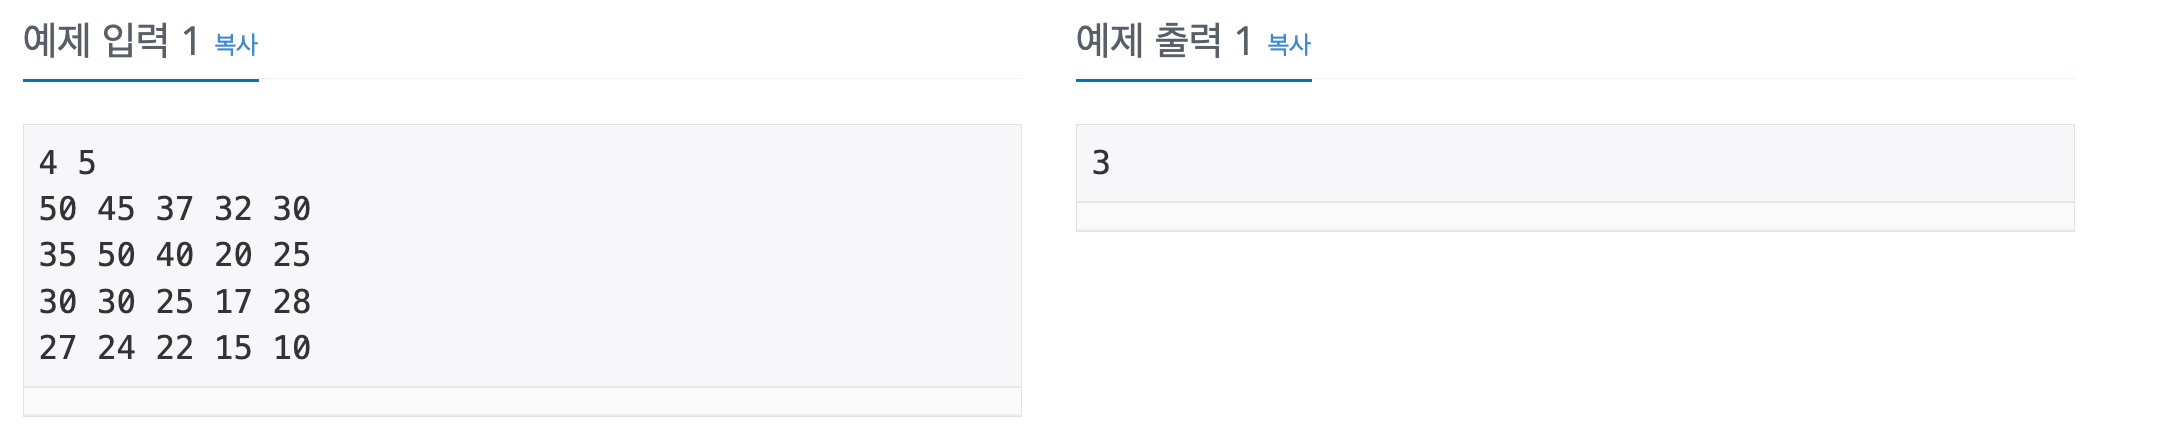

In [2]:
(500*500)**2

62500000000

In [ ]:
! # 끝 시간 체크

### 풀이

In [ ]:
import sys
input = sys.stdin.readline
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]
m, n = map(int,input().split())
arr = [list(map(int,input().split())) for _ in range(m)]
c = [[-1]*n for _ in range(m)]
def dfs(x,y):
    # 목적지에 도착하면 1 반환 -> 걸어온 모든 경로에 1을 더해준다.
    if x==m-1 and y==n-1:
        return 1
    if c[x][y] != -1: # 이미 방문한 곳이라면 (0 or n)
        return c[x][y]
    c[x][y] = 0 # 방문 표시 (경로수를 더해주진 않으면서 방문만 표시하기위해 0으로 마킹)
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if 0 <= nx < m and 0 <= ny < n:
            if arr[nx][ny] < arr[x][y]: # 내리막길 이라면
                c[x][y] += dfs(nx, ny)
    return c[x][y]
print(dfs(0,0))

In [18]:
from heapq import*
import sys
input = sys.stdin.readline
m, n = map(int,input().split())
arr = [list(map(int,input().split())) for _ in range(m)]
v = [[0]*n for _ in range(m)]
v[0][0] = 1
q = [ [-arr[0][0],0,0] ]
while q:
    h,x,y = heappop(q) # 가장 큰수 반환(최대힙)
    for i, j in [[x+1,y],[x-1,y],[x,y+1],[x,y-1]]:
        if 0<=i<m and 0<=j<n and arr[i][j] < arr[x][y]:
            if v[i][j] < 1: # 방문 하지 않은 경우
                heappush(q, [-arr[i][j],i,j])
            v[i][j]+=v[x][y]
print(v[-1][-1])

4 5
50 45 37 32 30
35 50 40 20 25
30 30 25 17 28
27 24 22 15 10
3


In [20]:
v

[[1, 1, 1, 1, 1], [1, 0, 0, 2, 1], [1, 0, 0, 2, 0], [1, 1, 1, 3, 3]]

In [ ]:
from heapq import *
import sys
input = sys.stdin.readline
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]
m, n = map(int,input().split())
arr = [list(map(int,input().split())) for _ in range(m)]
v = [[0]*n for _ in range(m)]
v[0][0]=1
q = [ [-arr[0][0],0,0] ]
while q:
    h,x,y = heappop(q) # 가장 큰수 반환(최대힙)
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if 0<=nx<m and 0<=ny<n and arr[nx][ny] < arr[x][y]:
            if v[nx][ny] < 1: # 방문 하지 않은 경우
                heappush(q, [-arr[nx][ny], nx, ny])
            v[nx][ny] += v[x][y]
print(v[-1][-1])

### 주석 달린 풀이

### 연습

In [3]:
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

In [4]:
m, n = map(int,input().split())
arr = [list(map(int,input().split())) for _ in range(m)]

4 5
50 45 37 32 30
35 50 40 20 25
30 30 25 17 28
27 24 22 15 10


In [14]:
c = [[-1]*n for _ in range(m)]
c

[[-1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1]]

In [15]:
def dfs(x,y):
    # 목적지에 도착하면 1 반환 -> 걸어온 모든 경로에 1을 더해준다.
    if x==m-1 and y==n-1:
        return 1
    if c[x][y] != -1: # 이미 방문한 곳이라면 (0 or n)
        return c[x][y]
    c[x][y] = 0 # 방문 표시 (경로수를 더해주진 않으면서 방문만 표시하기위해 0으로 마킹)
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if 0 <= nx < m and 0 <= ny < n:
            if arr[nx][ny] < arr[x][y]: # 내리막길 이라면
                c[x][y] += dfs(nx, ny)
    return c[x][y]

In [16]:
print(dfs(0, 0))

3


In [17]:
c

[[3, 2, 2, 2, 1], [1, -1, -1, 1, 1], [1, -1, -1, 1, -1], [1, 1, 1, 1, -1]]